In [3]:
# /1 OneHot encoding
# 2/ Analyser les repartitions de mes targets
# 3/ RMSE/R2 score / MAE
# 4/ verifier la coherence en affichant la coherence

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [35]:
df = pd.read_csv('Data/df_cleaned.csv', sep=",")
df.shape

(1512, 46)

In [36]:
# visualiser les targets pour transformation logarithmique par ex

In [37]:
data_numeric = df.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values

# select non numeric columns
data_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values

In [38]:
# dummies = pd.get_dummies(x.PrimaryPropertyType)
# # concatation of independent variables and new cateorical variable.
# x1= x.join(dummies).drop('PrimaryPropertyType', axis=1)
# x1

In [39]:
df

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,98101.0,7,47.61220,-122.33799,27,1.0,12,88434,0,88434.0,...,0,0,0,0,0,0,0,0,0,0
1,98101.0,7,47.61317,-122.33393,93,1.0,11,103566,15064,83880.0,...,0,0,0,0,0,0,0,0,0,0
2,98101.0,7,47.61412,-122.33664,26,1.0,10,61320,0,61320.0,...,0,0,0,0,0,0,0,0,0,0
3,98121.0,7,47.61375,-122.34047,77,1.0,18,175580,62000,123445.0,...,0,0,0,0,0,0,0,0,0,0
4,98101.0,7,47.61623,-122.33657,96,1.0,2,97288,37198,88830.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,0.0,2,47.56722,-122.31154,87,1.0,1,12294,0,12294.0,...,0,0,0,0,0,0,0,0,0,0
1508,0.0,2,47.59625,-122.32283,101,1.0,1,16000,0,16000.0,...,0,0,0,0,0,0,0,0,0,0
1509,0.0,7,47.63644,-122.35784,71,1.0,1,13157,0,7583.0,...,0,0,0,0,0,0,0,0,0,0
1510,0.0,1,47.52832,-122.32431,86,1.0,1,14101,0,6601.0,...,0,0,0,0,0,0,0,0,0,0


[ACTION] Nous allons séparer les variables indépendantes (labels) de la variable target:

In [41]:
x = df.drop(labels=['TotalGHGEmissions', 'GHGEmissionsIntensity',
                       'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','Latitude','Longitude','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','PrimaryPropertyType_','ZipCode','NumberofBuildings','LargestPropertyUseTypeGFA'], axis=1, inplace=False)
x

,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ProportionParkingGFA,...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,7,27,12,88434,0,60.0,2003882.00,3.946027e+06,1.276453e+06,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,93,11,103566,15064,61.0,0.00,3.242851e+06,5.145082e+06,0.0,...,0,0,0,0,0,0,0,0,0,0
2,7,26,10,61320,0,56.0,2214446.25,2.768924e+06,1.811213e+06,0.0,...,0,0,0,0,0,0,0,0,0,0
3,7,77,18,175580,62000,75.0,0.00,5.368607e+06,8.803998e+06,0.0,...,0,0,0,0,0,0,0,0,0,0
4,7,96,2,97288,37198,73.0,0.00,7.371434e+06,4.715182e+06,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,2,87,1,12294,0,46.0,0.00,5.242709e+05,3.254750e+05,0.0,...,0,0,0,0,0,0,0,0,0,0
1508,2,101,1,16000,0,73.0,0.00,3.965461e+05,5.537300e+05,0.0,...,0,0,0,0,0,0,0,0,0,0
1509,7,71,1,13157,0,73.0,0.00,1.792159e+06,3.973739e+06,0.0,...,0,0,0,0,0,0,0,0,0,0
1510,1,86,1,14101,0,73.0,0.00,3.488702e+05,3.706010e+05,0.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# target1_siteEUIWN = df['SiteEUIWN(kBtu/sf)']

# target2_sourceEUIWN = df['SourceEUIWN(kBtu/sf)']

target3_siteEnergyuse = df['SiteEnergyUseWN(kBtu)']

target4_totalGHGemissions = df['TotalGHGEmissions']

# target5_GHGemissionIntensity = df['GHGEmissionsIntensity']


## Linear Regression

In [43]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error

In [44]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, target3_siteEnergyuse, test_size=0.33)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
r2score = r2_score(y_test,yhat)
rmse = mean_squared_error(y_test, yhat, squared=False)
baseline_error = np.mean((yhat - y_test) ** 2)

print('MAE: %.3f' % mae)
print('R2SCORE: %.3f' % r2score)
print('RMSE: %.3f' % rmse)
print(baseline_error)

MAE: 156348.097
R2SCORE: 0.996
RMSE: 310800.710
96597081523.14563


In [45]:
print(model.coef_)

[ 1.16712571e+04  6.23416395e+02  8.91105096e+02  1.55464281e+00
 -1.33699295e+00 -2.98536896e+03  1.08811684e+00  9.83698732e-01
  1.05593515e+00 -6.23739719e+04 -1.51607167e+03 -9.50964487e+04
 -1.71667683e+04 -2.33328009e+05  8.89766130e+04 -1.47074976e+05
 -3.14010137e+04 -8.57746646e+04 -9.54773818e+04  7.65151925e+03
 -2.35999535e+04  8.94825262e+04  4.08760935e+04 -2.15467675e+04
  1.15322959e+04 -2.51588236e+04 -1.19767822e+05  3.83999668e+04
 -3.22024619e+03  8.17508194e+05 -4.03511509e+02 -1.15314592e+05
 -8.00962297e+04]


## Ridge & Lasso Regression

In [17]:
# gradientboosting - à utiliser & gradient Forest

faire un plot qui represente mes predictions vs la vrais valeurs- superpose y test vs les vrai valeurs (y pred)
prédire releve de conso = etude de regression


In [46]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

In [47]:
from sklearn.linear_model import Ridge
ridge = Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.01647e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.7545e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.58306e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.51326e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/maurelco/o

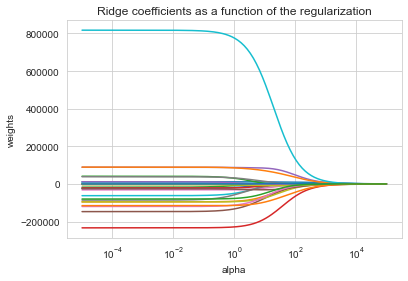

<Figure size 3600x3600 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.figure(figsize=(50,50))
plt.show()

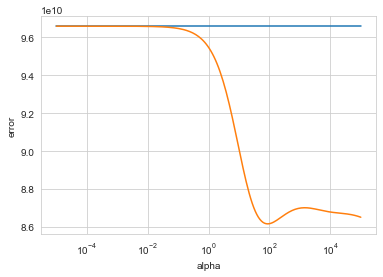

In [49]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [50]:
min(errors)

[96597081523.14563, 86160682505.68227]

In [51]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.116e+13, tolerance: 4.820e+12
  model = cd_fast.enet_coordinate_descent(
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.065e+13, tolerance: 4.820e+12
  model = cd_fast.enet_coordinate_descent(
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

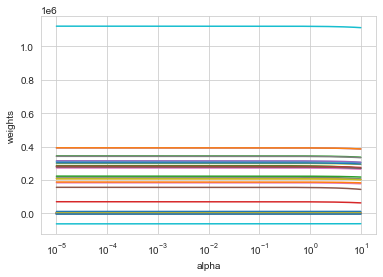

In [52]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [53]:
min(errors)

[96597081523.14563, 96532893932.50653]

In [54]:
# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [55]:
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(x.shape[1]-30, x.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(x, target3_siteEnergyuse)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# ajouter l'affichage du r score / RMSE
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best MAE: -166460982677.789
Best Config: {'sel__k': 19}
>-1223224944150.856 with: {'sel__k': 3}
>-1218653272078.146 with: {'sel__k': 4}
>-1219137190953.734 with: {'sel__k': 5}
>-1168001876863.378 with: {'sel__k': 6}
>-1166179788645.588 with: {'sel__k': 7}
>-574156491068.507 with: {'sel__k': 8}
>-345879481751.218 with: {'sel__k': 9}
>-208654775408.114 with: {'sel__k': 10}
>-168369478913.641 with: {'sel__k': 11}
>-168079650768.125 with: {'sel__k': 12}
>-168707783866.679 with: {'sel__k': 13}
>-168669282320.768 with: {'sel__k': 14}
>-168449626056.175 with: {'sel__k': 15}
>-167899815523.158 with: {'sel__k': 16}
>-167624764609.405 with: {'sel__k': 17}
>-166823182424.681 with: {'sel__k': 18}
>-166460982677.789 with: {'sel__k': 19}
>-167041872556.761 with: {'sel__k': 20}
>-167294622631.266 with: {'sel__k': 21}
>-167287834289.526 with: {'sel__k': 22}
>-167565300178.362 with: {'sel__k': 23}
>-167658679297.311 with: {'sel__k': 24}
>-167852401380.526 with: {'sel__k': 25}
>-168168931496.083 with: {